# DatacenterTemp Fan notebook example

In this example, a rule based controller is used to control the model "DatacenterTempFan-v0". At first we import the controller:

In [1]:
from energym.examples.Controller import DatacenterFanController

Next, we import Energym and create the simulation environment by specifying the model, a weather file and the number of simulation days.

In [2]:
import energym

weather = "USA_NY_NewYork_KennedyAP1"
env = energym.make("DatacenterTempFan-v0", weather=weather,simulation_days=300)

[OK] The current working directory is %s

[OK] fmiInstantiateSlave: Path to fmuUnzipLocation is not %s.

[OK] fmiInstantiateSlave: Path to fmuUnzipLocation is not %s.

[OK] fmiInstantiateSlave: Path to fmuUnzipLocation is not %s.

[OK] Command executes to copy content of resources folder: %s

[OK] fmiInstantiateSlave: Path to model description file is %s.

[OK] fmiInstantiateSlave: The FMU modelIdentifier is %s.

[OK] fmiInstantiateSlave: The FMU modelGUID is %s.

[OK] fmiInstantiateSlave: Slave %s is instantiated.

[OK] fmiInstantiateSlave: Instantiation of %s succeded.



The control inputs can be inspected using the `get_inputs_names()` method and to construct a controller, we pass the list of inputs and further parameters. This controller determines inputs to get close to the temperature setpoints.

In [3]:
inputs = env.get_inputs_names()
print(inputs)
controller = DatacenterFanController(inputs, 0.5, 1.0)

['Bd_Load_CPU', 'Z01_Fl_Fan_sp', 'Z01_T_HVAC_sp', 'Z02_Fl_Fan_sp', 'Z02_T_HVAC_sp']


To run the simulation, a number of steps is specified (here 96 steps per day for 10 days) and the obtained control inputs are passed to the simulation model with the `step()` method. To generate some plots later on, we save all the inputs and outputs in lists.

In [4]:
import numpy as np
steps = 96*10
out_list = []
outputs = env.get_output()
controls = []
for _ in range(steps):
    control = controller.get_control(outputs, 21)
    controls +=[ {p:control[p][0] for p in control} ]
    outputs = env.step(control)
    out_list.append(outputs)

[OK] fmiInitializeSlave: The sockfd is %d.

[OK] fmiInitializeSlave: The port number is %d.

[OK] fmiInitializeSlave: This hostname is %s.

[OK] fmiInitializeSlave: TCPServer Server waiting for clients on port: %d.

[OK] fmiInitializeSlave: The number of input variables is %d.

[OK] fmiInitializeSlave: The number of output variables is %d.

[OK] Get input file from resource folder %s.

[OK] Searching for following pattern %s

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Found matching file %s.

[OK] done searching pattern %s

[OK] Get input file from resource folder %s.

[OK] Searching for following pattern %s

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search for *.idf, *.epw, or *.idd file.

[OK] Read directory and search 

Since the inputs and outputs are given as dictionaries and are collected in lists, we can simply load them as a pandas.DataFrame.

In [5]:
import pandas as pd
out_df = pd.DataFrame(out_list)
cmd_df = pd.DataFrame(controls)

To generate plots, we can directly get the data from the DataFrames, by using the key names. Displayed are the zone temperatures and the setpoints determined by the controller for the two zones, the external temperature, and the total power demand.

<IPython.core.display.Javascript object>


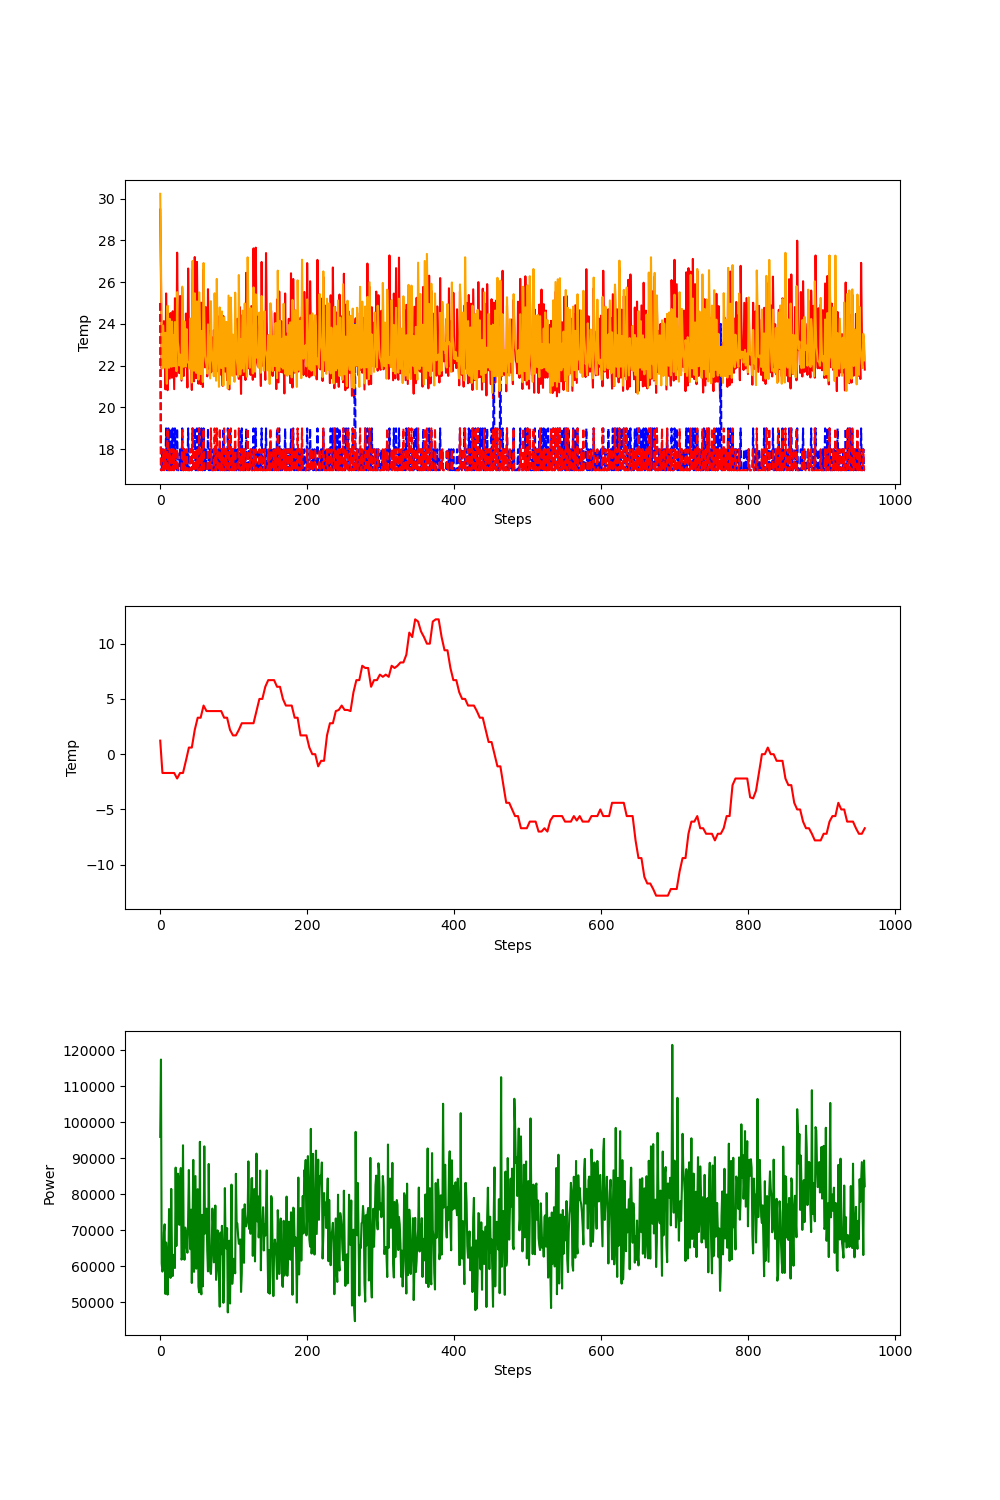

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

f, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,15))#


ax1.plot(out_df['Z01_T'], 'r')
ax1.plot(out_df['Z01_T_HVAC_sp_out'], 'b--')
ax1.plot(out_df['Z02_T'], 'orange')
ax1.plot(out_df['Z02_T_HVAC_sp_out'], 'r--')
ax1.set_ylabel('Temp')
ax1.set_xlabel('Steps')

ax2.plot(out_df['Ext_T'], 'r')
ax2.set_ylabel('Temp')
ax2.set_xlabel('Steps')

ax3.plot(out_df['Fa_Pw_All'], 'g')
ax3.set_ylabel('Power')
ax3.set_xlabel('Steps')

plt.subplots_adjust(hspace=0.4)

plt.show()

To end the simulation, the `close()` method is called. It deletes files that were produced during the simulation and stores some information about the simulation in the *runs* folder.

In [7]:
env.close()

[OK] fmiTerminateSlave: fmiFreeInstanceSlave must be called to free the FMU instance.

[OK] fmiFreeSlaveInstance: The function fmiFreeSlaveInstance of instance %s is executed.

[OK] freeInstanceResources: %s will be freed.

